In [1]:
!pip list

Package                   Version
------------------------- -----------
alembic                   1.7.7
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
asttokens                 2.0.5
attrs                     21.4.0
backcall                  0.2.0
beautifulsoup4            4.11.1
bleach                    5.0.0
certifi                   2022.5.18.1
cffi                      1.15.0
charset-normalizer        2.0.12
click                     8.1.3
cloudpickle               2.0.0
colorama                  0.4.4
databricks-cli            0.16.6
debugpy                   1.6.0
decorator                 5.1.1
defusedxml                0.7.1
docker                    5.0.3
entrypoints               0.4
executing                 0.8.3
fastjsonschema            2.15.3
Flask                     2.1.2
gitdb                     4.0.9
GitPython                 3.1.27
greenlet                  1.1.2
idna                      3.3
importlib-metadata        4.11.3
importlib-resources 

You should consider upgrading via the 'G:\STUDIA\ASI\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install -q pycaret

You should consider upgrading via the 'G:\STUDIA\ASI\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
from pycaret.utils import enable_colab

In [7]:
enable_colab()

Colab mode enabled.


In [8]:
import logging

In [9]:
import pandas as pd

In [21]:
dataset = pd.read_csv('data/data_all.csv')

In [22]:
print(dataset)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


In [23]:
dataset.shape

(1338, 7)

In [24]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [25]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [28]:
data = dataset.sample(frac=0.9, random_state=123)
data_unseen = dataset.drop(data.index)
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print(f'Dane do trenowania: {data.shape} \nDane do przewidywania: {data_unseen.shape}')

Dane do trenowania: (1204, 7) 
Dane do przewidywania: (134, 7)


In [31]:
from pycaret.regression import *
exp_reg101 = setup(data=data,target='charges',session_id=123)

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1204, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(842, 14)"


In [32]:
best = compare_models(exclude=['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2810.6902,23765941.0528,4831.3653,0.8204,0.4716,0.3456,0.0110
rf,Random Forest Regressor,2859.4995,24672275.4360,4919.5371,0.8134,0.4904,0.3634,0.0420
lightgbm,Light Gradient Boosting Machine,3071.9164,26345727.9791,5090.5741,0.7997,0.6075,0.3917,0.0100
et,Extra Trees Regressor,2892.2980,28511742.1639,5296.2685,0.7812,0.5022,0.3538,0.0410
ada,AdaBoost Regressor,4304.5654,29785506.3299,5413.3804,0.7781,0.6505,0.7667,0.0050
llar,Lasso Least Angle Regression,4202.5086,37484482.7114,6071.1286,0.7177,0.6041,0.4375,0.0030
ridge,Ridge Regression,4218.9271,37491415.8000,6071.6710,0.7176,0.5946,0.4402,0.0030
br,Bayesian Ridge,4216.5805,37497149.0246,6072.1527,0.7175,0.5960,0.4397,0.0030
lasso,Lasso Regression,4206.6448,37495167.2000,6072.1173,0.7173,0.6048,0.4377,0.1480
lr,Linear Regression,4207.1181,37502469.4000,6072.6525,0.7172,0.6073,0.4377,0.3790


In [33]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4710.9902,52634544.0000,7254.9668,0.7122,0.5276,0.4485
1,4272.9976,43643116.0000,6606.2935,0.5702,0.6521,0.4378
2,3717.7954,28428322.0000,5331.8218,0.7723,0.5371,0.3517
3,4511.7075,42568132.0000,6524.4258,0.6956,0.8386,0.4195
4,4545.2866,45835768.0000,6770.2119,0.6720,0.6736,0.4712
5,4456.4604,38933256.0000,6239.6519,0.7006,0.6125,0.5257
6,3351.5518,22967702.0000,4792.4629,0.7536,0.4686,0.3699
7,4614.7646,40330628.0000,6350.6401,0.6955,0.5748,0.4595
8,3525.5134,23165778.0000,4813.0840,0.7791,0.5745,0.4817


In [34]:
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


In [35]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2941.0428,26431686.4782,5141.1756,0.8555,0.4047,0.3336
1,2818.2423,29084697.1532,5393.0230,0.7136,0.4886,0.3028
2,2235.5790,16355807.1821,4044.2313,0.8690,0.4211,0.2401
3,3233.1364,32605021.8103,5710.0807,0.7669,0.5166,0.3325
4,3046.7070,26849994.8658,5181.6981,0.8079,0.5429,0.3999
5,2777.9895,23249167.7297,4821.7391,0.8212,0.4687,0.3328
6,2342.9445,12896338.7908,3591.1473,0.8617,0.3939,0.3366
7,2891.6154,26309354.9941,5129.2646,0.8014,0.4539,0.2877
8,2637.2499,16758616.1832,4093.7289,0.8402,0.5560,0.4625


In [36]:
print(gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [37]:
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4697.6670,52631480.0000,7254.7559,0.7122,0.5093,0.4453
1,4281.5366,43737440.0000,6613.4287,0.5692,0.6516,0.4394
2,3744.1707,28540632.0000,5342.3433,0.7714,0.5900,0.3569
3,4561.2363,42631700.0000,6529.2954,0.6952,0.8277,0.4243
4,4545.2847,45835772.0000,6770.2119,0.6720,0.6736,0.4712
5,4456.4604,38933260.0000,6239.6523,0.7006,0.6125,0.5257
6,3358.8857,23119826.0000,4808.3081,0.7520,0.4585,0.3671
7,4501.2676,38620272.0000,6214.5210,0.7084,0.4911,0.4258
8,3533.2825,22954738.0000,4791.1104,0.7811,0.6006,0.4920


In [38]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3291.5264,27579709.5697,5251.6388,0.8492,0.4782,0.3490
1,3644.2104,38633623.2979,6215.5952,0.6195,0.6072,0.4082
2,2979.3582,22991030.0909,4794.8963,0.8159,0.5638,0.3430
3,3582.8086,35357879.1209,5946.2492,0.7472,0.6548,0.4399
4,3620.2131,31185464.9939,5584.3948,0.7769,0.8021,0.6123
5,3494.3857,28916707.8219,5377.4258,0.7776,0.6700,0.4270
6,3108.2918,20098851.2991,4483.1742,0.7844,0.8382,0.4940
7,3573.3333,32736023.2599,5721.5403,0.7529,0.5373,0.3902
8,3296.5884,22633264.2668,4757.4430,0.7842,0.8510,0.5441


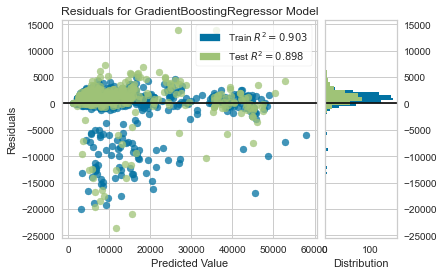

In [39]:
plot_model(gbr)

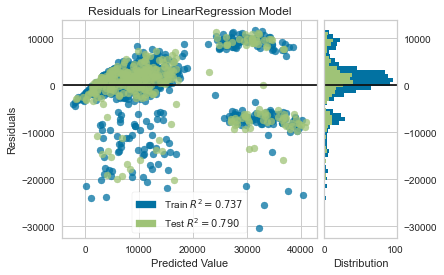

In [40]:
plot_model(lr)

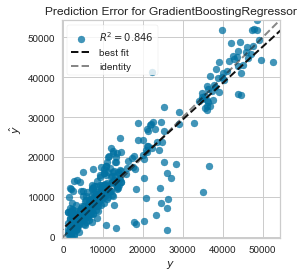

In [42]:
plot_model(tuned_gbr, plot='error')

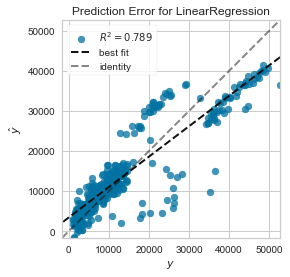

In [43]:
plot_model(tuned_lr, plot='error')

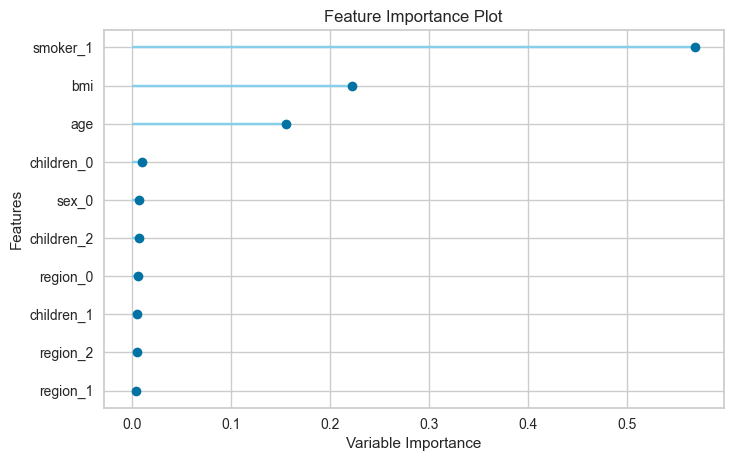

In [44]:
plot_model(tuned_gbr, plot='feature')

In [47]:
evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [48]:
final_model = finalize_model(tuned_gbr)

In [49]:
prediction = predict_model(final_model,data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,3545.9438,36044404.2998,6003.6992,0.7587,0.6667,0.4907


In [50]:
print(prediction)

     age  sex     bmi  children  smoker  region      charges         Label
0     28    1  33.000         3       0       2   4449.46200   7986.891889
1     33    1  22.705         0       0       1  21984.47061   4699.787782
2     37    1  29.830         2       0       0   6406.41070  14445.256147
3     52    0  30.780         1       0       0  10797.33620  15237.832819
4     23    1  23.845         0       0       0   2395.17155   4705.043616
..   ...  ...     ...       ...     ...     ...          ...           ...
129   20    1  22.000         1       0       3   1964.78000   2085.232226
130   25    0  30.200         0       1       3  33900.65300  31906.001192
131   42    1  26.315         1       0       1   6940.90985   6613.794215
132   19    0  20.600         0       0       3   1731.67700    771.622115
133   18    0  36.850         0       0       2   1629.83350   2216.691145

[134 rows x 8 columns]


In [51]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       134 non-null    int64  
 1   sex       134 non-null    int64  
 2   bmi       134 non-null    float64
 3   children  134 non-null    int64  
 4   smoker    134 non-null    int64  
 5   region    134 non-null    int64  
 6   charges   134 non-null    float64
 7   Label     134 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 8.5 KB


In [52]:
save_model(final_model,'20220519')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.15, loss='ls',
                                            max_depth=7, max_features=1.0,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.02,
                          